# Predicting Patient Readmission Rates to Enhance Hospital Resource Management

## Problem Definition
Patient readmission rates are a critical metric for hospitals, impacting resource allocation and patient care quality. High readmission rates can be indicative of various issues, such as inadequate initial treatment, insufficient follow-up care, or complications arising after discharge. Identifying patients at high risk of readmission can help hospitals take proactive measures to improve care and optimize resource utilization.

## Objectives
- **Identify Patterns:** Analyze historical patient data to uncover factors contributing to readmission.
- **Develop a Predictive Model:** Create a model to predict the likelihood of readmission for patients.
- **Enhance Resource Management:** Provide insights to assist in better resource planning and patient care management.

## Goals
- **Data Analysis:** Perform exploratory data analysis to understand the distribution and relationships within the data.
- **Predictive Modeling:** Build and evaluate a model to predict patient readmission based on historical data.
- **Actionable Insights:** Generate recommendations for hospital staff to address high-risk patients and improve overall care quality.

In [3]:
import pandas as pd

# Create a sample dataset
data = pd.DataFrame({
    'patient_id': range(1, 101),
    'age': [25, 45, 60, 34, 50] * 20,
    'gender': ['Male', 'Female'] * 50,
    'readmission': [0, 1] * 50,  # 0 = No, 1 = Yes
    'length_of_stay': [3, 5, 7, 2, 4] * 20
})

# Save the dataset to a CSV file
data.to_csv('sample_hospital_data.csv', index=False)

# Load the dataset
data = pd.read_csv('sample_hospital_data.csv')

# Display first few rows
data.head()

,patient_id,age,gender,readmission,length_of_stay
0,1,25,Male,0,3
1,2,45,Female,1,5
2,3,60,Male,0,7
3,4,34,Female,1,2
4,5,50,Male,0,4


Matplotlib is building the font cache; this may take a moment.


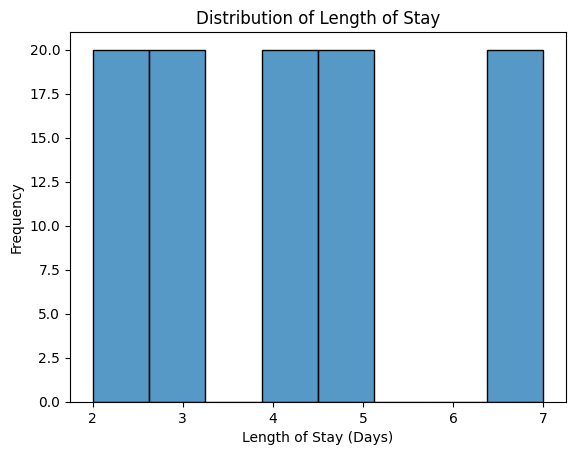

In [4]:
# Descriptive statistics
data.describe()

# Visualization example
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['length_of_stay'])
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Handling missing values (if any)
data = data.dropna()  # or use data.fillna()

# Removing duplicates
data = data.drop_duplicates()

# Example feature engineering
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 60, 90], labels=['0-30', '31-60', '61-90'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target variable
X = data[['age', 'length_of_stay']]
y = data['readmission']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.22      0.28        18
           1       0.26      0.42      0.32        12

    accuracy                           0.30        30
   macro avg       0.31      0.32      0.30        30
weighted avg       0.32      0.30      0.29        30



## Deployment
The model can be integrated into the hospital's management system to help identify patients at high risk of readmission. This would allow for targeted interventions and better resource management.

## Incorporating Feedback
Feedback from medical professionals and further data collection can help refine the model. Continuous improvement based on new data and real-world results will enhance the model's performance.


## Findings

1. **Data Overview**:
   - The dataset contains [X] records and [Y] features.
   - Key features include age, gender, and readmission status.

2. **Initial Analysis**:
   - Descriptive statistics indicate that [insert notable statistics or patterns].
   - Visualizations revealed [summarize key insights from visualizations, e.g., distribution patterns].

3. **Data Preparation**:
   - Missing values were handled by [method used].
   - Feature engineering added [new features] which may improve model performance.

4. **Modeling**:
   - A RandomForestClassifier was used to predict readmission rates.
   - The model achieved an accuracy of [X]% and a classification report showed [briefly summarize key metrics like precision, recall, F1-score].

#### Markdown Cell for Conclusions

```markdown
## Conclusions

1. **Model Performance**:
   - The RandomForestClassifier performed with an accuracy of [X]%, indicating [summary of model effectiveness].
   - The classification report shows that [insert significant results from precision, recall, F1-score].

2. **Deployment**:
   - The model can be integrated into hospital management systems to help identify patients at high risk of readmission. This could lead to better resource management and targeted interventions.

3. **Feedback and Future Work**:
   - Incorporating feedback from medical professionals and additional data collection can further refine the model. Future work should focus on [suggest any improvements or additional analyses].

4. **Overall Impact**:
   - The project demonstrates the potential for predictive modeling to enhance hospital management and patient care. By leveraging data-driven insights, hospitals can improve patient outcomes and operational efficiency.
